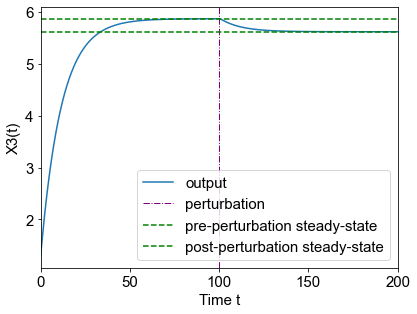

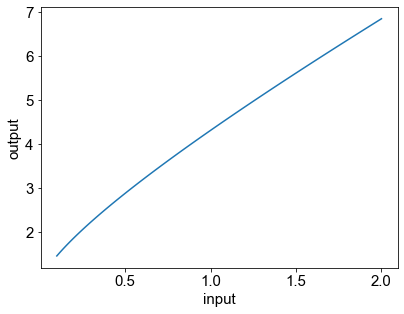

In [8]:
# Python script for the review of
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import matplotlib.font_manager as font_manager

unboundedness_threshold = 10000
finalTime = 200
perturbationTime = 100
numTimeSamples = 10000
tol = 0.01

plt.rcParams.update({
    "font.family": "sans-serif",
    "font.sans-serif": ["Arial"],
    "xtick.labelsize": 15,  # large tick labels
    'font.size': 15,
    'figure.figsize': [6.4, 4.8]}  # default: 6.4 and 4.8 620/72, 300/72
)
legend_font = font_manager.FontProperties(family='Arial',
                                          weight='bold',
                                          style='normal', size=15)

# This network has 3 species and 10 reactions (including the input reaction)

u_after_perturbation = 1.5
u_before_perturbation = 1.6
u_range = np.linspace(0.1, 2, num=100)
# The reaction rates
num_species = 3
num_reactions = 10
reactantMatrix = np.zeros([num_species, num_reactions])
productMatrix = np.zeros([num_species, num_reactions])

k = np.array([0.324, 0.202, 0.2, 0.121, 0.097, 0.0863, 0.0391, 0.007, 0.001])
# k = 1 + 0.5 * np.random.rand(num_reactions-1)
initial_state = 1 + 0.5 * np.random.rand(num_species)

# reaction 0: input reaction 0---> X1
productMatrix[0, 0] = 1

# k_32, x_1 + x_3 --> ∅ = 0.3249043728532883
reactantMatrix[0, 1] = 1
reactantMatrix[2, 1] = 1
# k_4, ∅ --> x_1 + x_3 = 0.20276869164726444

# k_41, x_1 + x_3 --> x_1 = 0.20002339019555018
# k_31, x_1 + x_2 --> ∅ = 0.12171569180616508
# k_16, x_1 --> 2*x_3 = 0.09704881050156534
# k_30, 2*x_1 --> ∅ = 0.08633972930416442
# k_55, 2*x_1 --> 2*x_3 = 0.039167207767242314
# k_37, 2*x_1 --> x_3 = 0.0071364580949030716
# k_13, x_1 --> x_1 + x_3 = 0.0010663966023871049


# reaction 1: X1 + X2 --> 0

# reaction 2: 0--> X1 + X2
productMatrix[0, 2] = 1
productMatrix[1, 2] = 1
# reaction 3: X1 + X2 --> X3
reactantMatrix[0, 3] = 1
reactantMatrix[1, 3] = 1
productMatrix[2, 3] = 1
# reaction 4: 2 X1 --> 0
reactantMatrix[0, 4] = 2
# reaction 5: X1 --> X2 + X3
reactantMatrix[0, 5] = 1
productMatrix[1, 5] = 1
productMatrix[2, 5] = 1
# reaction 6: X3 --> 0
reactantMatrix[2, 6] = 1
# reaction 7: 2 X1 --> X2 + X3
reactantMatrix[0, 7] = 2
productMatrix[1, 7] = 1
productMatrix[2, 7] = 1
# reaction 8: 2 X1 --> X2
reactantMatrix[0, 8] = 2
productMatrix[1, 8] = 1
# reaction 9: X1 --> X1 + X2
reactantMatrix[0, 9] = 1
productMatrix[0, 9] = 1
productMatrix[1, 9] = 1

stoichoimetricMatrix = productMatrix - reactantMatrix


def reaction_dy_dt(x, t):
    f = np.zeros(num_reactions)
    f[0] = u
    for i in range(1, num_reactions):
        f[i] = k[i-1]
        for j in range(num_species):
            f[i] = f[i] * (x[j] ** reactantMatrix[j, i])

    return np.matmul(stoichoimetricMatrix, f)


times1 = np.linspace(0, perturbationTime, num=numTimeSamples)
times2 = np.linspace(perturbationTime, finalTime, num=numTimeSamples)
# start a new figure
plt.figure(1)
u = u_before_perturbation
x_trajectory1 = odeint(reaction_dy_dt, initial_state, times1)
current_state = x_trajectory1[-1, :]
u = u_after_perturbation
x_trajectory2 = odeint(reaction_dy_dt, current_state, times2)
times = np.concatenate((times1, times2))
output_trajectory = np.concatenate((x_trajectory1[:, num_species-1], x_trajectory2[:, num_species-1]))
plt.plot(times, output_trajectory, linewidth=1.5, label='output')
plt.xlabel('Time t')
plt.ylabel('X3(t)')
# set x-axis range from 0 to finalTime
plt.xlim(0, finalTime)
plt.axvline(x=perturbationTime, linewidth=1.0, linestyle="dashdot", color='purple', label='perturbation')
plt.axhline(y=x_trajectory1[-1, num_species-1], color='g', linewidth=1.5, linestyle='--', label='pre-perturbation steady-state')
plt.axhline(y=x_trajectory2[-1, num_species-1], color='g', linewidth=1.5, linestyle='--', label='post-perturbation steady-state')
plt.legend()
plt.savefig('dynamics.png', bbox_inches='tight', transparent="False", pad_inches=0)
plt.show()


plt.figure(2)
setpoints = np.zeros(len(u_range))
for i in range(len(u_range)):
    u = u_range[i]
    x_trajectory = odeint(reaction_dy_dt, initial_state, times1)
    setpoints[i] = x_trajectory[-1, num_species-1]
plt.plot(u_range, setpoints, linewidth=1.5, label='setpoints')
plt.xlabel('input')
plt.ylabel('output')
plt.savefig('steady_state_response.png', bbox_inches='tight', transparent="False", pad_inches=0)
plt.show()

In [9]:
reactantMatrix

array([[0., 1., 0., 1., 2., 1., 0., 2., 2., 1.],
       [0., 1., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.]])

In [10]:
productMatrix

array([[1., 0., 1., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 1., 0., 1., 1., 1.],
       [0., 0., 0., 1., 0., 1., 0., 1., 0., 0.]])

In [11]:
stoichoimetricMatrix

array([[ 1., -1.,  1., -1., -2., -1.,  0., -2., -2.,  0.],
       [ 0., -1.,  1., -1.,  0.,  1.,  0.,  1.,  1.,  1.],
       [ 0.,  0.,  0.,  1.,  0.,  1., -1.,  1.,  0.,  0.]])

[[ 1. -1.  1.  0. -2. -1. -2. -2. -2.  0.]
 [ 0.  0.  0.  0. -1.  0.  0.  0.  0.  0.]
 [ 0. -1.  1. -1.  0.  2.  0.  2.  1.  1.]]


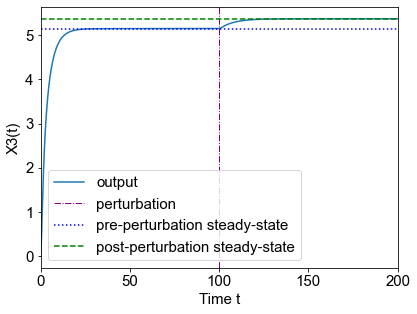

pre-perturbation steady-state:  5.150586102287881
post-perturbation steady-state:  5.374722584201595


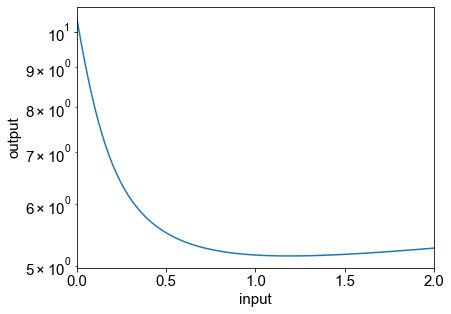

In [14]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import matplotlib.font_manager as font_manager

unboundedness_threshold = 10000
finalTime = 200
perturbationTime = 100
numTimeSamples = 10000
tol = 0.01

plt.rcParams.update({
    "font.family": "sans-serif",
    "font.sans-serif": ["Arial"],
    "xtick.labelsize": 15,  # large tick labels
    'font.size': 15,
    'figure.figsize': [6.4, 4.8]}  # default: 6.4 and 4.8 620/72, 300/72
)
legend_font = font_manager.FontProperties(family='Arial',
                                          weight='bold',
                                          style='normal', size=15)

# This network has 3 species and 10 reactions (including the input reaction)

u_after_perturbation = 0.6
u_before_perturbation = 1.2
u_range = np.linspace(0.0, 2, num=100)
# The reaction rates
num_species = 3
num_reactions = 10
reactantMatrix = np.zeros([num_species, num_reactions])
productMatrix = np.zeros([num_species, num_reactions])

# k = np.array([0.324, 0.202, 0.2, 0.121, 0.097, 0.0863, 0.0391, 0.0071, 0.001]) # Nicolo
k = np.array([0.324, 0.202, 0.2, 0.121, 0.9, 0.0863, 0.5, 0.00, 0.00]) # to be saved....gives a nice Ultrasensitive response
#for i in range(len(k)):
#    k[i] = k[i] * (1 + 0.5 * (np.random.rand() - 0.5))
# initial_state = 1 + 0.5 * np.random.rand(num_species)
initial_state = np.zeros(num_species)
# reaction 0: input reaction 0---> X1
productMatrix[0, 0] = 1

# reaction 1: X1 + X3 --> 0
reactantMatrix[0, 1] = 1
reactantMatrix[2, 1] = 1
# reaction 2: 0--> X1 + X3
productMatrix[0, 2] = 1
productMatrix[2, 2] = 1
# reaction 3: X1 + X3 --> X1
reactantMatrix[0, 3] = 1
reactantMatrix[2, 3] = 1
productMatrix[0, 3] = 1
# reaction 4: 2 X1+ X2 --> 0
reactantMatrix[0, 4] = 2
reactantMatrix[1, 4] = 1
# reaction 5: X1 --> 2 X3
reactantMatrix[0, 5] = 1
productMatrix[2, 5] = 2
# reaction 6: 2 X1 --> 0
reactantMatrix[0, 6] = 2
# reaction 7: 2 X1 --> 2 X3
reactantMatrix[0, 7] = 2
productMatrix[2, 7] = 2
# reaction 8: 2 X1 --> X3
reactantMatrix[0, 8] = 2
productMatrix[2, 8] = 1
# reaction 9: X1 --> X1 + X3
reactantMatrix[0, 9] = 1
productMatrix[0, 9] = 1
productMatrix[2, 9] = 1

stoichoimetricMatrix = productMatrix - reactantMatrix
print(stoichoimetricMatrix)

def reaction_dy_dt(x, t):
    f = np.zeros(num_reactions)
    f[0] = u
    for s in range(1, num_reactions):
        f[s] = k[s-1]
        for li in range(num_species):
            f[s] = f[s] * (x[li] ** reactantMatrix[li, s])

    return np.matmul(stoichoimetricMatrix, f)


times1 = np.linspace(0, perturbationTime, num=numTimeSamples)
times2 = np.linspace(perturbationTime, finalTime, num=numTimeSamples)
# start a new figure
plt.figure(1)
u = u_before_perturbation
x_trajectory1 = odeint(reaction_dy_dt, initial_state, times1)
current_state = x_trajectory1[-1, :]

u = u_after_perturbation
x_trajectory2 = odeint(reaction_dy_dt, current_state, times2)
times = np.concatenate((times1, times2))
output_trajectory = np.concatenate((x_trajectory1[:, num_species-1], x_trajectory2[:, num_species-1]))
plt.plot(times, output_trajectory, linewidth=1.5, label='output')
plt.xlabel('Time t')
plt.ylabel('X3(t)')
# set x-axis range from 0 to finalTime
plt.xlim(0, finalTime)
plt.axvline(x=perturbationTime, linewidth=1.0, linestyle="dashdot", color='purple', label='perturbation')
plt.axhline(y=x_trajectory1[-1, num_species-1], color='b', linewidth=1.5, linestyle=':', label='pre-perturbation steady-state')
plt.axhline(y=x_trajectory2[-1, num_species-1], color='g', linewidth=1.5, linestyle='--', label='post-perturbation steady-state')
plt.legend()
plt.savefig('dynamics.png', bbox_inches='tight', transparent="False", pad_inches=0)


plt.show()
print("pre-perturbation steady-state: ", x_trajectory1[-1, num_species-1])
print("post-perturbation steady-state: ", x_trajectory2[-1, num_species-1])

plt.figure(2)
setpoints = np.zeros(len(u_range))
for i in range(len(u_range)):
    u = u_range[i]
    x_trajectory = odeint(reaction_dy_dt, initial_state, times1)
    setpoints[i] = x_trajectory[-1, num_species-1]
plt.plot(u_range, setpoints, linewidth=1.5, label='setpoints')
plt.xlabel('input')
plt.xlim(0, 2)
plt.ylabel('output')
plt.savefig('steady_state_response.png', bbox_inches='tight', transparent="False", pad_inches=0)

plt.yscale('log')
plt.xscale('linear')
plt.show()

[[ 1. -1.  1.  0. -2. -1. -2. -2. -2.  0.]
 [ 0.  0.  0.  0. -1.  0.  0.  0.  0.  0.]
 [ 0. -1.  1. -1.  0.  2.  0.  2.  1.  1.]]
pre-perturbation steady-state:  1.7307012734745895 1.7307012730308853


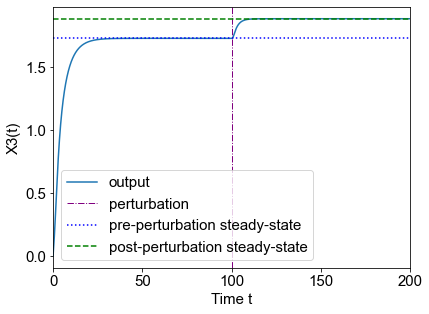

post-perturbation steady-state:  1.886384559450676 1.8863845593134863


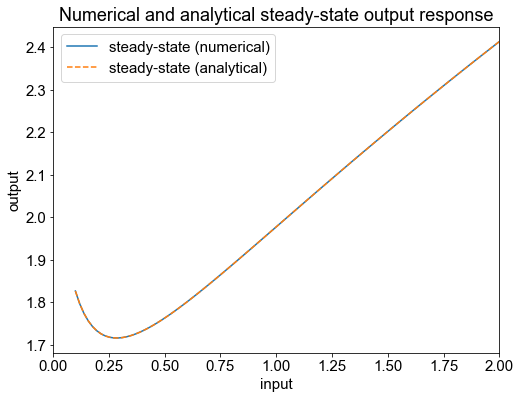

In [35]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import matplotlib.font_manager as font_manager

unboundedness_threshold = 10000
finalTime = 200
perturbationTime = 100
numTimeSamples = 10000
tol = 0.01

plt.rcParams.update({
    "font.family": "sans-serif",
    "font.sans-serif": ["Arial"],
    "xtick.labelsize": 15,  # large tick labels
    'font.size': 15,
    'figure.figsize': [6.4, 4.8]}  # default: 6.4 and 4.8 620/72, 300/72
)
legend_font = font_manager.FontProperties(family='Arial',
                                          weight='bold',
                                          style='normal', size=15)

# This network has 3 species and 10 reactions (including the input reaction)

u_after_perturbation = 0.8
u_before_perturbation = 0.2
u_range = np.linspace(0.1, 2, num=100)
# The reaction rates
num_species = 3
num_reactions = 10
reactantMatrix = np.zeros([num_species, num_reactions])
productMatrix = np.zeros([num_species, num_reactions])

# k = np.array([0.324, 0.202, 0.2, 0.121, 0.097, 0.0863, 0.0391, 0.0071, 0.001]) # Nicolo
#                             * controls the right side of the curve
# [0.324, 0.202, 0.2, 0.121, 0.9, 0.0863, 0.5, 0.00, 0.00] # AG - to be saved....gives a nice Ultrasensitive response
# [0.324, 0.202, 0.2, 0.121, 0.4, 0.0863, 0.5, 0.00, 0.00] # NR - U shape
k = np.array(
    [0.324, 0.202, 0.2, 0.121, 0.4, 0.0863, 0.5, 0.00, 0.00])  # to be saved....gives a nice Ultrasensitive response
# for i in range(len(k)):
#     k[i] = k[i] * (1 + 0.5 * (np.random.rand() - 0.5))
# initial_state = 1 + 0.5 * np.random.rand(num_species)
initial_state = np.zeros(num_species)
# reaction 0: input reaction 0---> X1
productMatrix[0, 0] = 1

# reaction 1: X1 + X3 --> 0
reactantMatrix[0, 1] = 1
reactantMatrix[2, 1] = 1
# reaction 2: 0--> X1 + X3
productMatrix[0, 2] = 1
productMatrix[2, 2] = 1
# reaction 3: X1 + X3 --> X1
reactantMatrix[0, 3] = 1
reactantMatrix[2, 3] = 1
productMatrix[0, 3] = 1
# reaction 4: 2 X1+ X2 --> 0
reactantMatrix[0, 4] = 2
reactantMatrix[1, 4] = 1
# reaction 5: X1 --> 2 X3
reactantMatrix[0, 5] = 1
productMatrix[2, 5] = 2
# reaction 6: 2 X1 --> 0
reactantMatrix[0, 6] = 2
# reaction 7: 2 X1 --> 2 X3
reactantMatrix[0, 7] = 2
productMatrix[2, 7] = 2
# reaction 8: 2 X1 --> X3
reactantMatrix[0, 8] = 2
productMatrix[2, 8] = 1
# reaction 9: X1 --> X1 + X3
reactantMatrix[0, 9] = 1
productMatrix[0, 9] = 1
productMatrix[2, 9] = 1

stoichoimetricMatrix = productMatrix - reactantMatrix
print(stoichoimetricMatrix)


def reaction_dy_dt(x, t):
    f = np.zeros(num_reactions)
    f[0] = u
    for s in range(1, num_reactions):
        f[s] = k[s - 1]
        for li in range(num_species):
            f[s] = f[s] * (x[li] ** reactantMatrix[li, s])

    return np.matmul(stoichoimetricMatrix, f)


def steadyStateOutput(u, k):
    theta1 = k[0]
    theta2 = k[1]
    theta3 = k[2]
    theta4 = k[4]
    theta5 = k[5]
    theta6 = k[6]

    # A x^2 + B x + C = 0
    A = 2 * (theta5 * theta1 + theta5 * theta3 + 2 * theta6 * theta1 + theta6 * theta3)
    B = 3 * theta1 * theta4 + theta3 * theta4
    C = -(theta1 + theta3) * u - theta3 * theta2
    D = B ** 2 - 4 * A * C
    x1 = (-B + np.sqrt(D)) / (2 * A)
    x3 = (2 * theta6 * (x1 ** 2) + 2 * theta4 * x1 + theta2) / ((theta1 + theta3) *x1)
    return x3


times1 = np.linspace(0, perturbationTime, num=numTimeSamples)
times2 = np.linspace(perturbationTime, finalTime, num=numTimeSamples)
# start a new figure
plt.figure(1)
u = u_before_perturbation
x_trajectory1 = odeint(reaction_dy_dt, initial_state, times1)
current_state = x_trajectory1[-1, :]
print("pre-perturbation steady-state: ", x_trajectory1[-1, num_species-1], steadyStateOutput(u_before_perturbation, k))

u = u_after_perturbation
x_trajectory2 = odeint(reaction_dy_dt, current_state, times2)
times = np.concatenate((times1, times2))
output_trajectory = np.concatenate((x_trajectory1[:, num_species - 1], x_trajectory2[:, num_species - 1]))
plt.plot(times, output_trajectory, linewidth=1.5, label='output')
plt.xlabel('Time t')
plt.ylabel('X3(t)')
# set x-axis range from 0 to finalTime
plt.xlim(0, finalTime)
plt.axvline(x=perturbationTime, linewidth=1.0, linestyle="dashdot", color='purple', label='perturbation')
plt.axhline(y=x_trajectory1[-1, num_species - 1], color='b', linewidth=1.5, linestyle=':',
            label='pre-perturbation steady-state')
plt.axhline(y=x_trajectory2[-1, num_species - 1], color='g', linewidth=1.5, linestyle='--',
            label='post-perturbation steady-state')
plt.legend()
plt.savefig('dynamics.png', bbox_inches='tight', transparent="False", pad_inches=0)

plt.show()
print("post-perturbation steady-state: ", x_trajectory2[-1, num_species-1], steadyStateOutput(u_after_perturbation, k))

plt.figure(2)
setpoints_num = np.zeros(len(u_range))
setpoints_anal = np.zeros(len(u_range))
for i in range(len(u_range)):
    u = u_range[i]
    x_trajectory = odeint(reaction_dy_dt, initial_state, times1)
    setpoints_num[i] = x_trajectory[-1, num_species-1]
    setpoints_anal[i] = steadyStateOutput(u, k)
plt.plot(u_range, setpoints_num, linewidth=1.5, label='steady-state (numerical)')
plt.plot(u_range, setpoints_anal, linewidth=1.5, label='steady-state (analytical)', linestyle='--')
plt.xlabel('input')
plt.xlim(0, 2)
plt.ylabel('output')
plt.title("Numerical and analytical steady-state output response")
plt.gcf().set_size_inches(8,6)
plt.savefig('steady_state_response_L.png', bbox_inches='tight', transparent="False", pad_inches=0, dpi=300)
plt.legend()
plt.yscale('linear')
plt.xscale('linear')
plt.show()